<a href="https://colab.research.google.com/github/yunjeong-chang/smarcle-winter-study/blob/main/RNN1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<LSTM을 이용한 로이터 뉴스 카테고리 분류하기>

*   긴 텍스트를 읽고 데이터가 어떤 의미를 지니는지 카테고리로 분류하는 것



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy
import os

# 로이터 뉴스 데이터셋 불러오기 
from keras.datasets import reuters #(총 11,228개의 뉴스 기사가 46개의 카테고리로 나누어진 대용량 텍스트 데이터)
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.compat.v1.set_random_seed(3)

# 불러온 데이터를 학습셋, 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인하기
category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

2113536/2110848 [==============================] - 0s 0us/step
46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 28s 3ms/step - loss: 2.5409 - accuracy: 0.3743 - val_loss: 2.0280 - val_accuracy: 0.4987
Epoch 2/20
8982/8982 [==============================] - 27s 3ms/step - loss: 1.9326 - accuracy: 0.4902 - val_loss: 1.8743 - val_accuracy: 0.4907
Epoch 3/20
8982/8982 [==============================] - 27s 3ms/step - loss: 1.8036 - accuracy: 0.5203 - val_loss: 1.7567 - val_accuracy: 0.5432
Epoch 4/20
8982/8982 [==============================] - 27s 3ms/step - loss: 1.7092 - accuracy: 0.5520 - val_loss: 1.7340 - val_accuracy: 0.5637
Epoch 5/20
8982/8982 [==============================] - 27s 3ms/step - loss: 1.6443 - accuracy: 0.5775 - val_loss: 1.6807 - val_accuracy: 0.5712
Epoch 6/20
8982/8982 [==============================] - 27s 3ms/step - loss: 1.5496 - accuracy: 0.6031 - val_loss: 1.5587 - val_accuracy: 0.6055


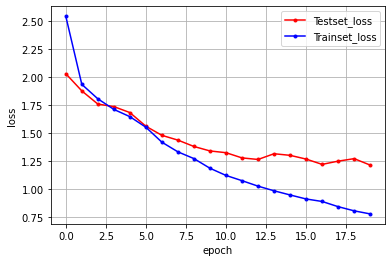

In [ ]:

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
